<a href="https://colab.research.google.com/github/SelciaSouceradjou/Algorithmic-Trading/blob/main/Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('TSLA.csv')
df = df.set_index('Date')

In [ ]:
# Set starting balance
balance = 10000000

In [ ]:
# Calculate the fast and slow moving averages
fast_ma = df['Close'].rolling(window=10).mean()
slow_ma = df['Close'].rolling(window=30).mean()

In [ ]:
# Create a new column for the signal
df['Signal'] = None

In [ ]:
# Create a new column for the position size
df['Position Size'] = None

In [ ]:
# Loop through the data and generate signals
for i in range(1, len(df)):
    if fast_ma[i] < slow_ma[i] and fast_ma[i-1] > slow_ma[i-1]:
        # Fast MA crossed below slow MA
        df['Signal'][i] = 'Buy'
        df['Position Size'][i] = balance / df['Close'][i]
    elif fast_ma[i] > slow_ma[i] and fast_ma[i-1] < slow_ma[i-1]:
        # Fast MA crossed above slow MA
        df['Signal'][i] = 'Sell'
        df['Position Size'][i] = 0

<ipython-input-9-8467f5b313f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][i] = 'Buy'
<ipython-input-9-8467f5b313f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position Size'][i] = balance / df['Close'][i]
<ipython-input-9-8467f5b313f1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][i] = 'Sell'
<ipython-input-9-8467f5b313f1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
# Calculate the P&L
df['P&L'] = df['Position Size'].shift(1) * (df['Close'] - df['Close'].shift(1))

In [ ]:
# Calculate the cumulative P&L
df['Cumulative P&L'] = df['P&L'].cumsum() + balance

In [ ]:
# Calculate the profit and loss percentages
df['Profit %'] = df['P&L'] / balance * 100
df['Loss %'] = df['P&L'].apply(lambda x: x if x < 0 else 0) / balance * 100

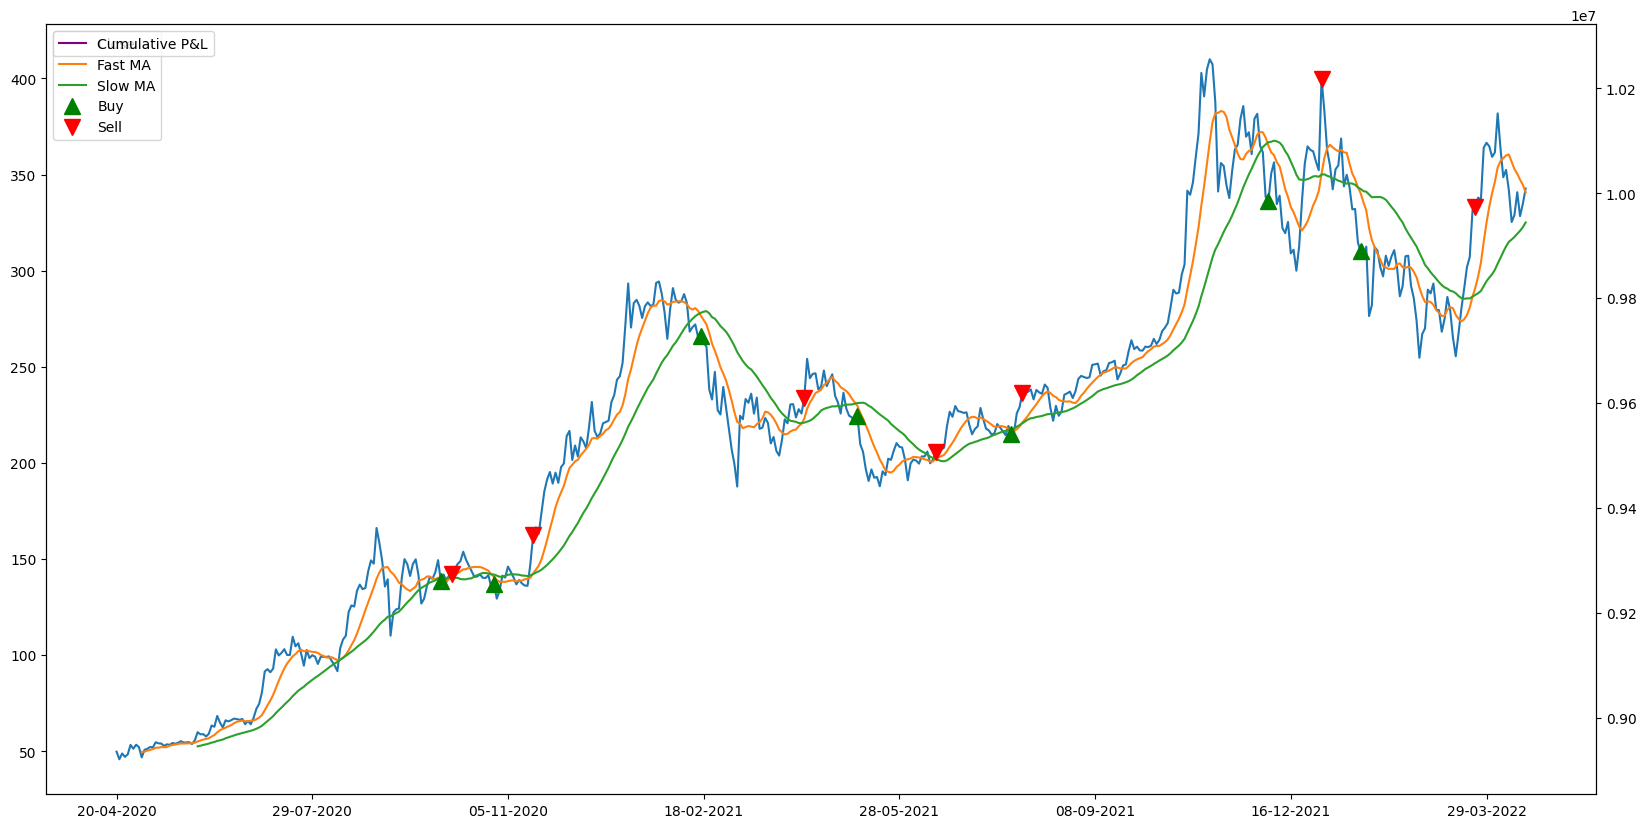

In [ ]:
# Plot the data with the buy/sell signals and P&L
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df['Close'], label='Close')
ax.plot(fast_ma, label='Fast MA')
ax.plot(slow_ma, label='Slow MA')

ax.plot(df[df['Signal']=='Buy'].index,
        df['Close'][df['Signal']=='Buy'],
        marker='^', color='green', markersize=12, label='Buy', linestyle='')

ax.plot(df[df['Signal']=='Sell'].index,
        df['Close'][df['Signal']=='Sell'],
        marker='v', color='red', markersize=12, label='Sell', linestyle='')

ax2 = ax.twinx()
ax2.plot(df['Cumulative P&L'], color='purple', label='Cumulative P&L')

tick_positions = df.index[::70]
plt.xticks(tick_positions, rotation=45)

ax.legend()
ax2.legend(loc='upper left')

In [ ]:
# Calculate the final P&L
final_pl = df['Cumulative P&L'][-1] - balance

In [ ]:
# Print the final P&L
print("Final P&L: {:.2f} USD".format(final_pl))

Final P&L: nan USD


In [ ]:
# Calculate the total profit and loss
total_profit = df[df['P&L'] > 0]['P&L'].sum()
total_loss = df[df['P&L'] < 0]['P&L'].sum()

In [ ]:
# Print the total profit and loss
print("Total Profit: {:.2f} USD".format(total_profit))
print("Total Loss: {:.2f} USD".format(total_loss))

Total Profit: 712829.44 USD
Total Loss: -1458836.06 USD


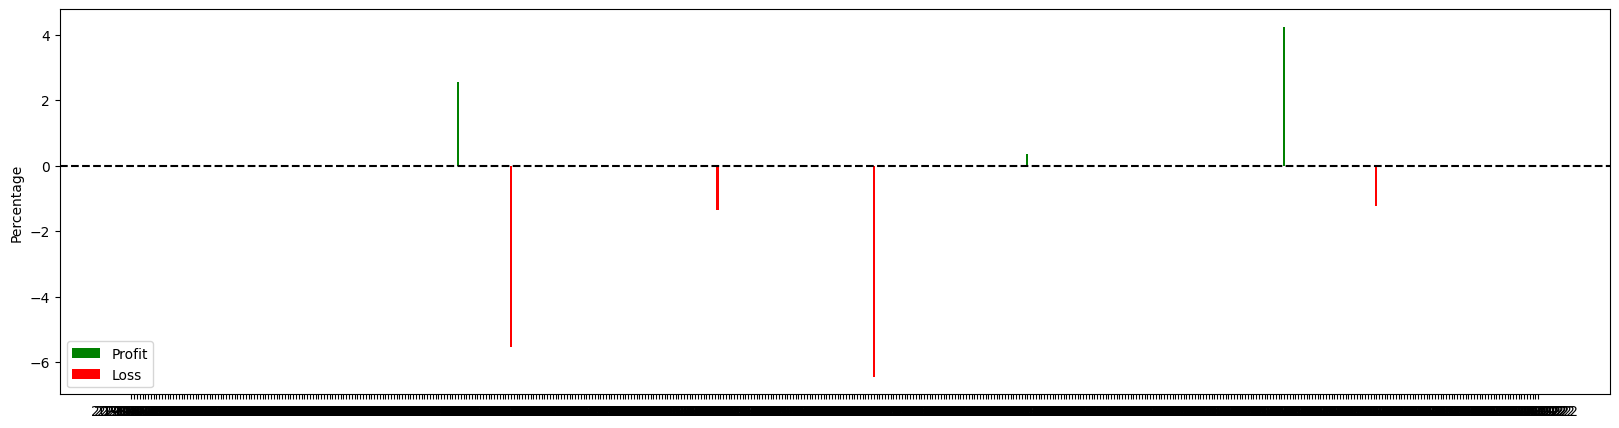

,Close,Signal,Position Size,P&L,Cumulative P&L,Profit %,Loss %
Date,,,,,,,
20-04-2020,49.757332,None,None,None,None,None,0.0
21-04-2020,45.781334,None,None,None,None,None,0.0
22-04-2020,48.807335,None,None,None,None,None,0.0
23-04-2020,47.042000,None,None,None,None,None,0.0
24-04-2020,48.343334,None,None,None,None,None,0.0
...,...,...,...,...,...,...,...
12-04-2022,328.983337,None,None,None,None,None,0.0
13-04-2022,340.790009,None,None,None,None,None,0.0
14-04-2022,328.333344,None,None,None,None,None,0.0


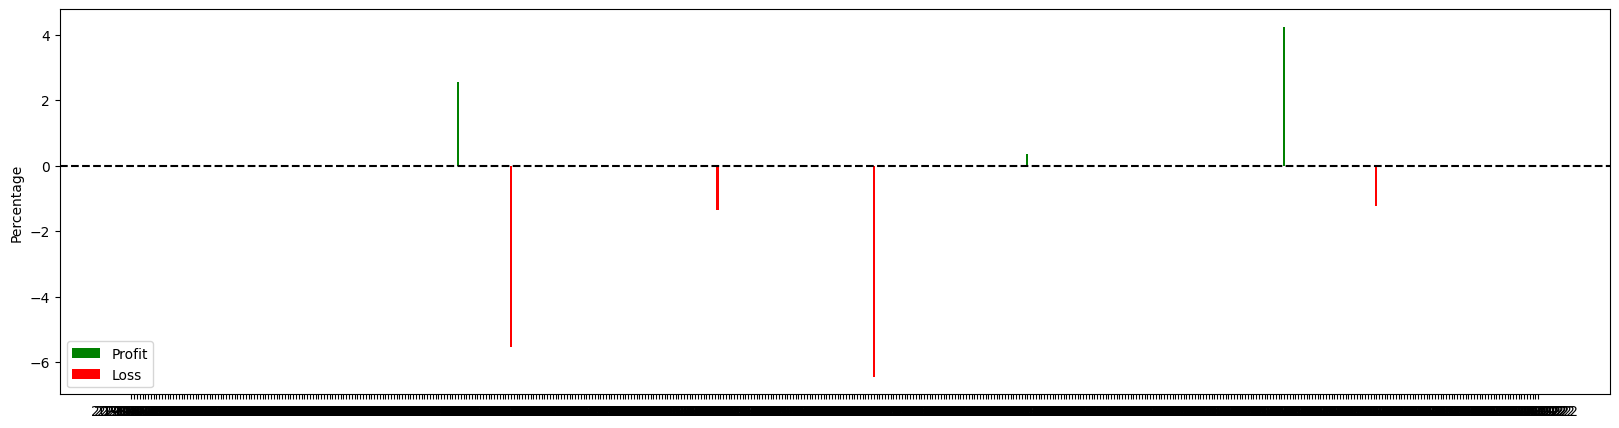

,Close,Signal,Position Size,P&L,Cumulative P&L,Profit %,Loss %
Date,,,,,,,
20-04-2020,49.757332,None,None,None,None,None,0.0
21-04-2020,45.781334,None,None,None,None,None,0.0
22-04-2020,48.807335,None,None,None,None,None,0.0
23-04-2020,47.042000,None,None,None,None,None,0.0
24-04-2020,48.343334,None,None,None,None,None,0.0
...,...,...,...,...,...,...,...
12-04-2022,328.983337,None,None,None,None,None,0.0
13-04-2022,340.790009,None,None,None,None,None,0.0
14-04-2022,328.333344,None,None,None,None,None,0.0


In [ ]:
# Plot the profit and loss percentages
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(df.index, df['Profit %'], color='green', label='Profit')
ax.bar(df.index, df['Loss %'], color='red', label='Loss')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_ylabel('Percentage')
ax.legend()
plt.show()
df